In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report , accuracy_score


In [ ]:
df = pd.read_csv('heart.csv')

In [53]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [54]:
print(f"Number of Records (Rows): {df.shape[0]}")
print(f"Number of Features (Columns): {df.shape[1]}")

Number of Records (Rows): 918
Number of Features (Columns): 12


In [55]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [56]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [57]:
print(f'{df['Age'].mean(): .2f}')

 53.51


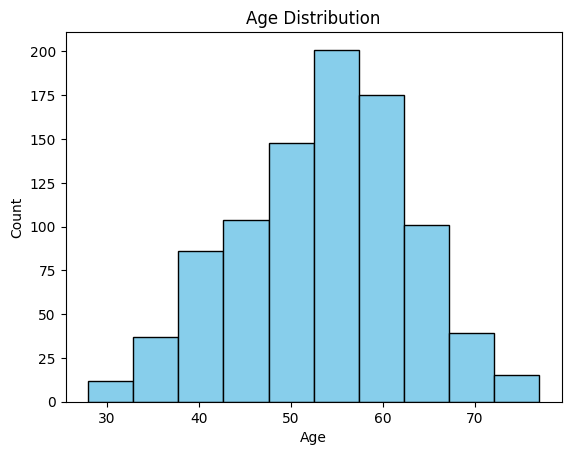

In [58]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [59]:
gender_counts = df['Sex'].value_counts()
print(gender_counts)

Sex
M    725
F    193
Name: count, dtype: int64


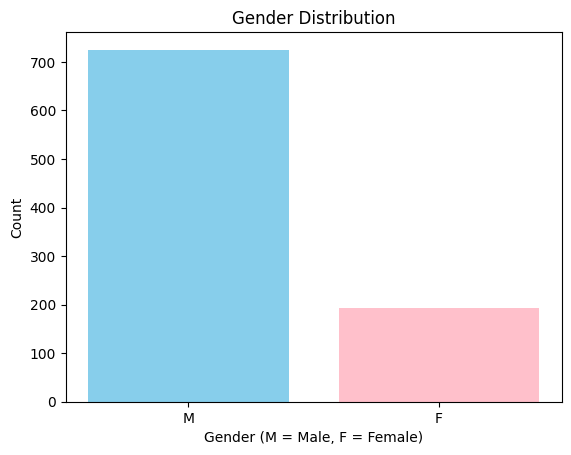

In [60]:
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender (M = Male, F = Female)')
plt.ylabel('Count')
plt.show()

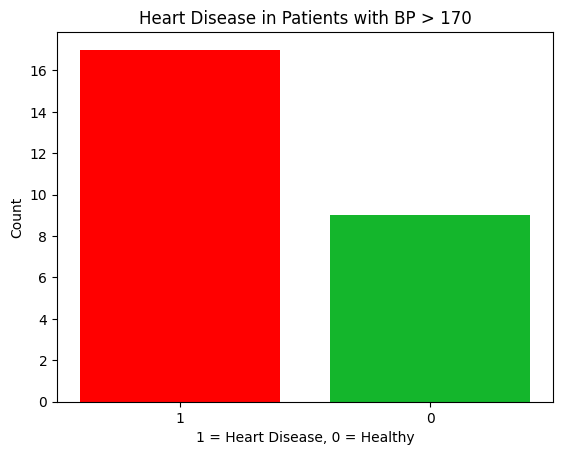

In [61]:
high_bp_patients = df[df['RestingBP'] > 170]
heart_disease_counts = high_bp_patients['HeartDisease'].value_counts()
plt.bar(heart_disease_counts.index.astype(str), heart_disease_counts.values, color=["red", '#14B62C'])
plt.title('Heart Disease in Patients with BP > 170')
plt.xlabel('1 = Heart Disease, 0 = Healthy')
plt.ylabel('Count')
plt.show()

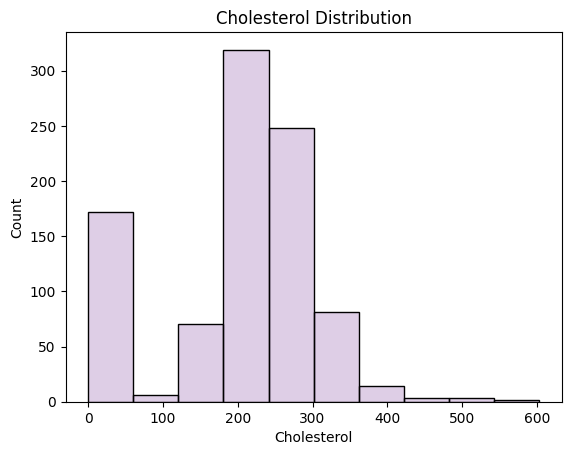

In [62]:
plt.hist(df['Cholesterol'], bins=10, color="#81409F41", edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

In [63]:
print(df[df['RestingBP'] == 0])

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  


In [64]:
df = df[df['RestingBP' ]!= 0 ]
print(df.shape)

(917, 12)


In [65]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [66]:
print(df[df['Cholesterol'] == 0])

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y  

In [67]:
cholesterol_median = df[df['Cholesterol'] > 0]['Cholesterol'].median()
print(cholesterol_median)

237.0


In [68]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median

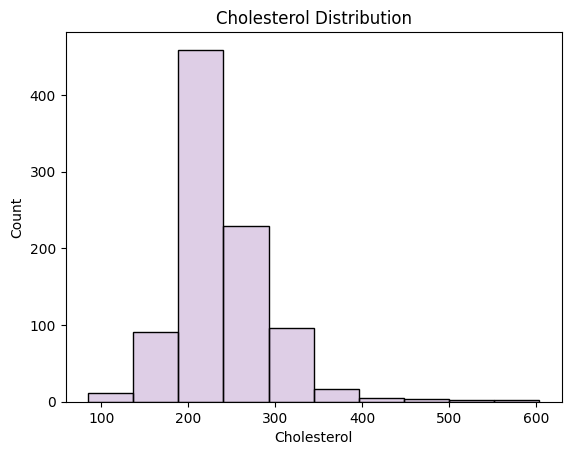

In [83]:
plt.hist(df['Cholesterol'], bins=10, color="#81409F41", edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

In [69]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [70]:
print(df[df['MaxHR']== 60])

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
390   51   M           ASY        140          237          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
390     60              N      0.0     Flat             1  


In [71]:
print(df[df['Oldpeak']== 6.2])
print(df[df['Oldpeak']== -2.6])

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
850   62   F           ASY        160          164          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
850    145              N      6.2     Down             1  
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
324   46   M           ASY        100          237          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
324    133              N     -2.6     Flat             1  


In [72]:
for col in df.select_dtypes(include= 'object').columns:
    print(f'{col}: {df[col].unique()}')

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [73]:
df_final = pd.get_dummies(df , drop_first=True , dtype=int)
df_final

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [74]:
df_final.corr(numeric_only= True)['HeartDisease'].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
RestingBP            0.117990
RestingECG_ST        0.103067
Cholesterol          0.076262
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
ChestPainType_NAP   -0.215311
MaxHR               -0.401410
ChestPainType_ATA   -0.401680
ST_Slope_Up         -0.621843
Name: HeartDisease, dtype: float64

In [75]:
x = df_final.drop('HeartDisease', axis= 1)
y = df_final['HeartDisease']

In [76]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.20 , random_state=42 )

In [77]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
model = SVC()
model.fit(x_train , y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [79]:
y_prediction = model.predict(x_test)

In [80]:
pd.DataFrame(y_test.values , y_prediction)

,0
0,0
1,1
1,1
1,1
0,0
...,...
0,1
1,1
1,1
0,0


In [81]:
print(accuracy_score(y_test, y_prediction)*100 , '%')

86.41304347826086 %


In [82]:
print(classification_report(y_test , y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.91      0.87      0.89       112

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

